# Homework 1
### 20.11.2020
### Akarun Ayça Ersoy

# Task 1

In [14]:
setwd('/Users/user/Documents/AYCADoc/BOUN/IE582')
library(data.table)

#Reading and combining the data for 3 seasons
data2021 <- fread('E2021.csv')
data1920 <-fread('E1920.csv')
data1819 <- fread('E1819.csv')
data <- rbind(data1819,data1920,data2021, fill=TRUE)

## Histogram of Goals scored by the Home Team with Poisson Distribution

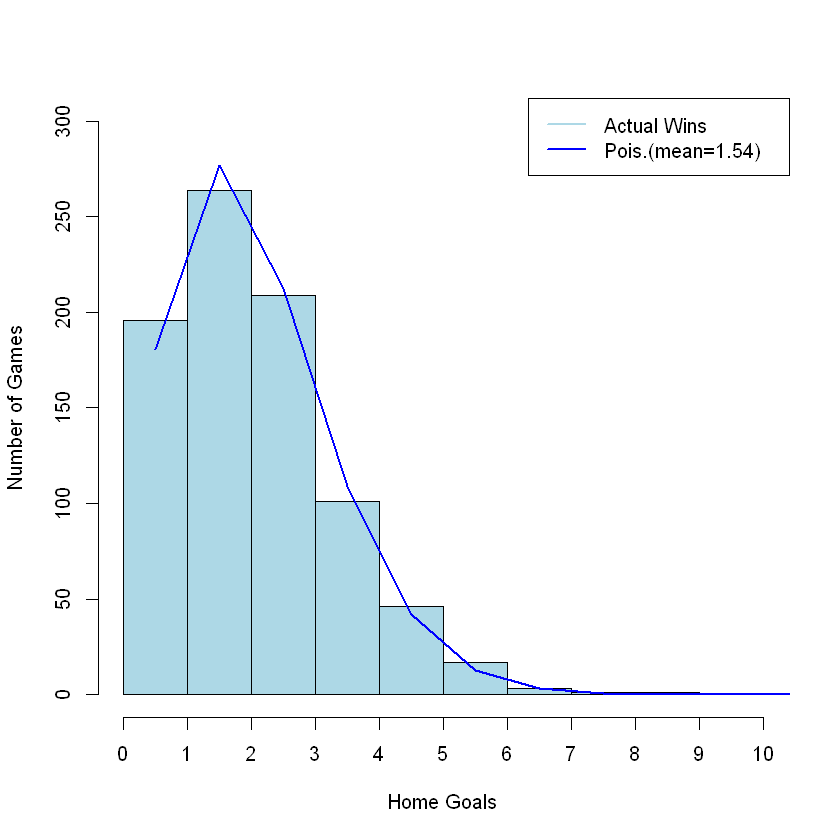

In [2]:
#Histogram of Goals scored by the Home Team
hist(data$FTHG, breaks=0:10, right=FALSE, ylab="Number of Games", 
     xlab="Home Goals", main=NULL, ylim=c(0,300),xaxp=c(0,10,10), col="lightblue")

#Using the mean of home goals, poisson distribution is calculated
xfit<-seq(0.5,10.5, by=1)
yfit<-dpois(c(0:10),lambda=mean(data$FTHG))*838
lines(xfit,yfit,col="blue", lwd=2)
legend("topright", c("Actual Wins", "Pois.(mean=1.54)"), lwd=2, col=c("lightblue","blue"))
options(repr.plot.width=7, repr.plot.height=5)

## Histogram of Goals scored by the Away Team with Poisson Distribution

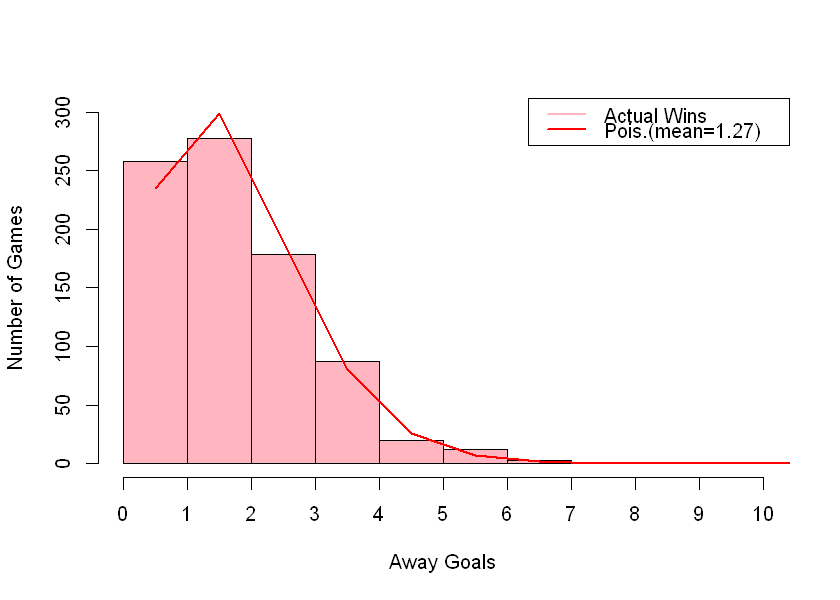

In [3]:
#Histogram of Goals scored by the Away Team with P-dist
hist(data$FTAG, breaks=0:10, right=FALSE, ylab="Number of Games",
     xlab="Away Goals", main=NULL, ylim=c(0,300), xaxp=c(0,10,10), col="lightpink")

#Using the mean of home goals, poisson distribution is calculated
xfit<-seq(0.5,10.5, by=1)
yfit<-dpois(c(0:10),lambda=mean(data$FTAG))*838
lines(xfit, yfit, col="red", lwd=2)
legend("topright", c("Actual Wins", "Pois.(mean=1.27)"), lwd=2, col=c("lightpink","red"))

The actual goals scored by the home team and the away team seems to be similar to a poisson distribution.

## Histogram of the Difference in Goals

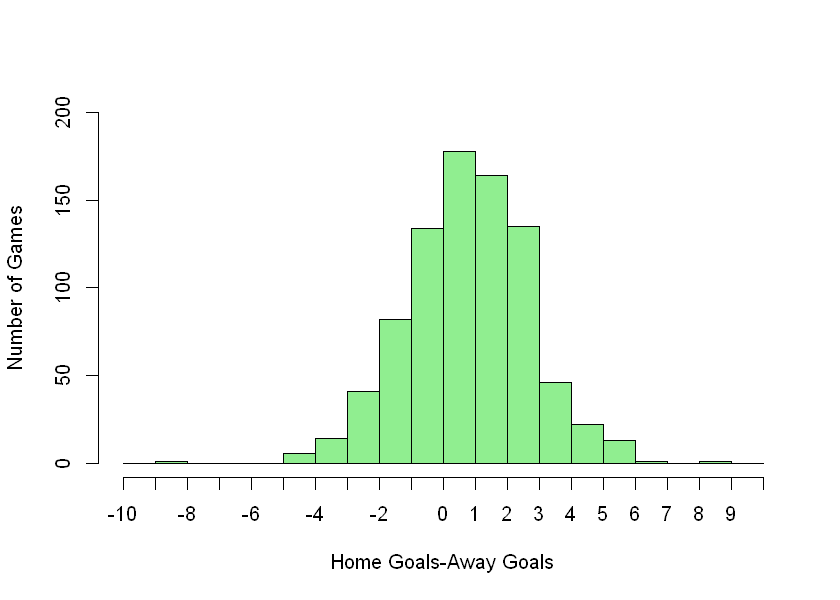

In [4]:
diffGoals <- data$FTHG-data$FTAG
hist(diffGoals, breaks=-10:10, right=FALSE, 
     ylab="Number of Games", xlab="Home Goals-Away Goals", main=NULL, 
     ylim=c(0,200), xaxp=c(-10,10,20), col="lightgreen")

# Task 2

The aim is to compare the odds given by the bookmakers and the actual odds of getting a draw.
### 1. Interwetten

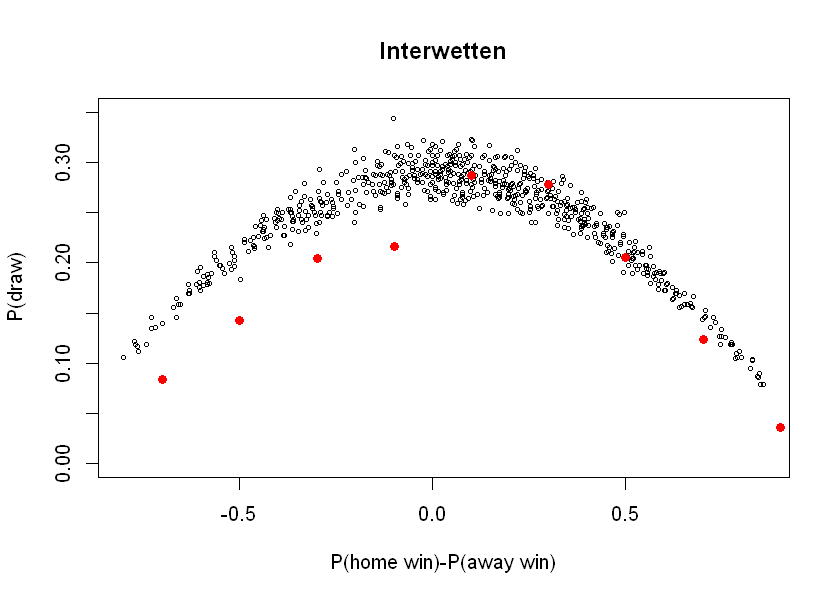

In [5]:
#Bookmaker 1 - Interwetten
# The probabilities are calculated from the given odds and stored in a new data frame
#along with the results (H,A,D) of each match.
prob1 <- data.frame("pHW"=1/data$IWH, "pTie"=1/data$IWD,
                    "pAW"=1/data$IWA, "Result"=data$FTR)
#Normalizing the odds given by the bookmaker
prob1$normHW <- prob1$pHW*(1/(prob1$pHW+prob1$pTie+prob1$pAW))
prob1$normAW <- prob1$pAW*(1/(prob1$pHW+prob1$pTie+prob1$pAW))
prob1$normTie <- prob1$pTie*(1/(prob1$pHW+prob1$pTie+prob1$pAW))

#The difference between home wins and away wins are separated into bins
prob1$bins <- cut(prob1$pHW-prob1$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
#The number of draws in each bin is calculated and divided by the total number of matches in each bin
DinBin <- tapply(prob1$Result, prob1$bins, function(x) sum(x=='D'))
DinBin <- DinBin/summary(prob1$bins)

plot(prob1$normHW-prob1$normAW, prob1$normTie, col="black", 
     cex=.5, ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Interwetten')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin, pch=19, col='red')

### 2. Pinnacle

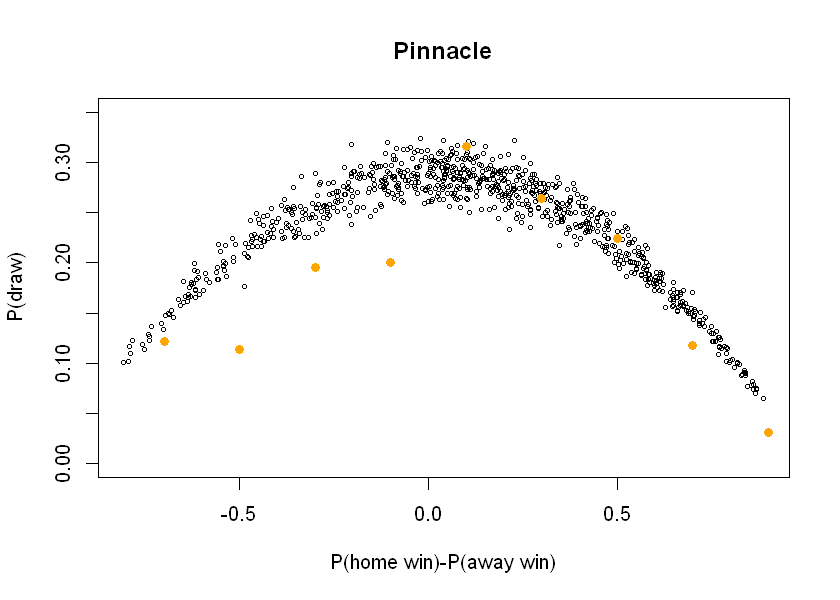

In [6]:
#Bookmaker 2 - Pinnacle
prob2 <- data.frame("pHW"=1/data$PSH, "pTie"=1/data$PSD,
                    "pAW"=1/data$PSA, "Result"=data$FTR)
prob2$normHW <- prob2$pHW*(1/(prob2$pHW+prob2$pTie+prob2$pAW))
prob2$normAW <- prob2$pAW*(1/(prob2$pHW+prob2$pTie+prob2$pAW))
prob2$normTie <- prob2$pTie*(1/(prob2$pHW+prob2$pTie+prob2$pAW))

prob2$bins <- cut(prob2$pHW-prob2$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin2 <- tapply(prob2$Result, prob2$bins, function(x) sum(x=='D'))
DinBin2 <- DinBin2/summary(prob2$bins)
plot(prob2$normHW-prob2$normAW, prob2$normTie, col="black", 
     cex=.5, ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Pinnacle')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin2, pch=19, col='orange')

### 3. William Hill

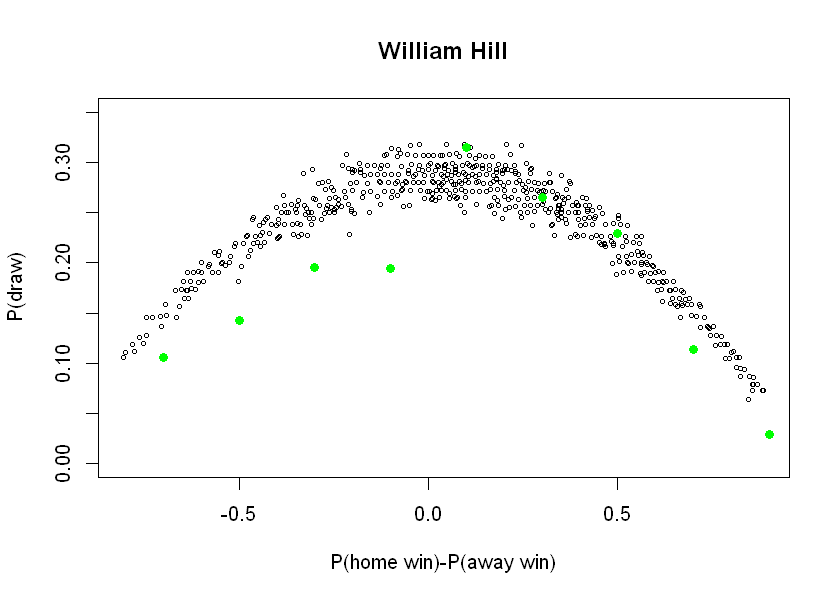

In [7]:
#Bookmaker 3 - William Hill
prob3 <- data.frame("pHW"=1/data$WHH, "pTie"=1/data$WHD,
                    "pAW"=1/data$WHA, "Result"=data$FTR)
prob3$normHW <- prob3$pHW*(1/(prob3$pHW+prob3$pTie+prob3$pAW))
prob3$normAW <- prob3$pAW*(1/(prob3$pHW+prob3$pTie+prob3$pAW))
prob3$normTie <- prob3$pTie*(1/(prob3$pHW+prob3$pTie+prob3$pAW))

prob3$bins <- cut(prob3$pHW-prob3$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin3 <- tapply(prob3$Result, prob3$bins, function(x) sum(x=='D'))
DinBin3 <- DinBin3/summary(prob3$bins)
plot(x=prob3$normHW-prob3$normAW, y=prob3$normTie, col="black", 
     cex=.5, 
     ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='William Hill')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin3, pch=19, col='green')

### 4. Bet & Win

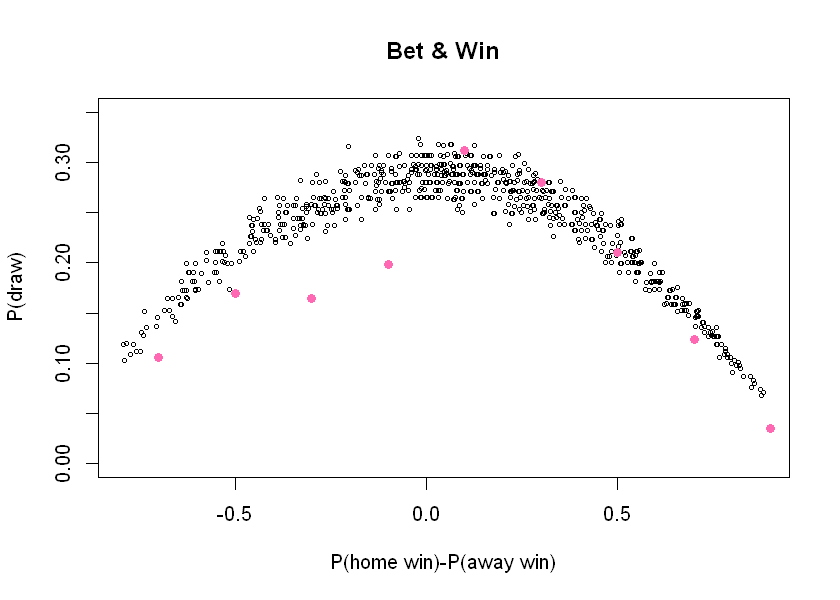

In [8]:
#Bookmaker 4 - Bet & Win
prob4 <- data.frame("pHW"=1/data$BWH, "pTie"=1/data$BWD,
                    "pAW"=1/data$BWA, "Result"=data$FTR)
prob4$normHW <- prob4$pHW*(1/(prob4$pHW+prob4$pTie+prob4$pAW))
prob4$normAW <- prob4$pAW*(1/(prob4$pHW+prob3$pTie+prob4$pAW))
prob4$normTie <- prob4$pTie*(1/(prob4$pHW+prob4$pTie+prob4$pAW))

prob4$bins <- cut(prob4$pHW-prob4$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin4 <- tapply(prob4$Result, prob4$bins, function(x) sum(x=='D'))
DinBin4 <- DinBin4/summary(prob4$bins)
plot(x=prob4$normHW-prob4$normAW, y=prob4$normTie, col="black", 
     cex=.5, 
     ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Bet & Win')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin4, pch=19, col='hotpink')

It appears that all bookmakers (Interwetten, Pinnacle, William Hill, Bet & Win), give higher odds for getting a 'draw' than the actual results. There is a positive bias.

# Task 3

This time, the games where the home team or the away team receieved a red card are removed from the dataset.

In [9]:
#Dataset No Red Cards (NR)
dataNR<-data[!(data$HR!=0 | data$HY>=4),]

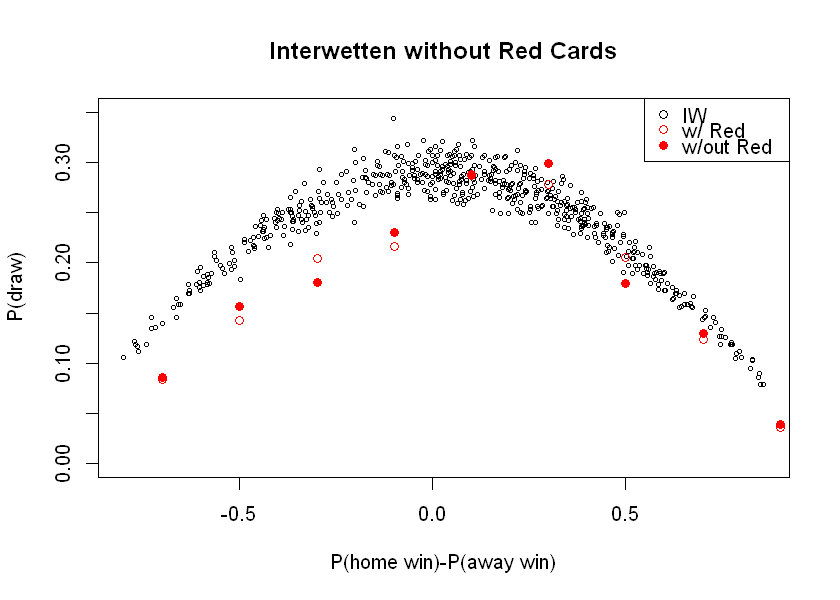

In [10]:
#Interwetten NR
prob1NR <- data.frame("pHW"=1/dataNR$IWH, "pTie"=1/dataNR$IWD,
                    "pAW"=1/dataNR$IWA, "Result"=dataNR$FTR)
prob1NR$normHW <- prob1NR$pHW*(1/(prob1NR$pHW+prob1NR$pTie+prob1NR$pAW))
prob1NR$normAW <- prob1NR$pAW*(1/(prob1NR$pHW+prob1NR$pTie+prob1NR$pAW))
prob1NR$normTie <- prob1NR$pTie*(1/(prob1NR$pHW+prob1NR$pTie+prob1NR$pAW))

prob1NR$bins <- cut(prob1NR$pHW-prob1NR$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin1NR <- tapply(prob1NR$Result, prob1NR$bins, function(x) sum(x=='D'))
DinBin1NR <- DinBin1NR/summary(prob1NR$bins)
plot(prob1NR$normHW-prob1NR$normAW, prob1NR$normTie, col="black", 
     cex=.5, ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Interwetten without Red Cards')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin, pch=1, col='red')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin1NR, pch=19, col='red')
legend("topright", c("IW", "w/ Red", "w/out Red"), col=c("black","red", "red"), pch=c(1,1,19) )


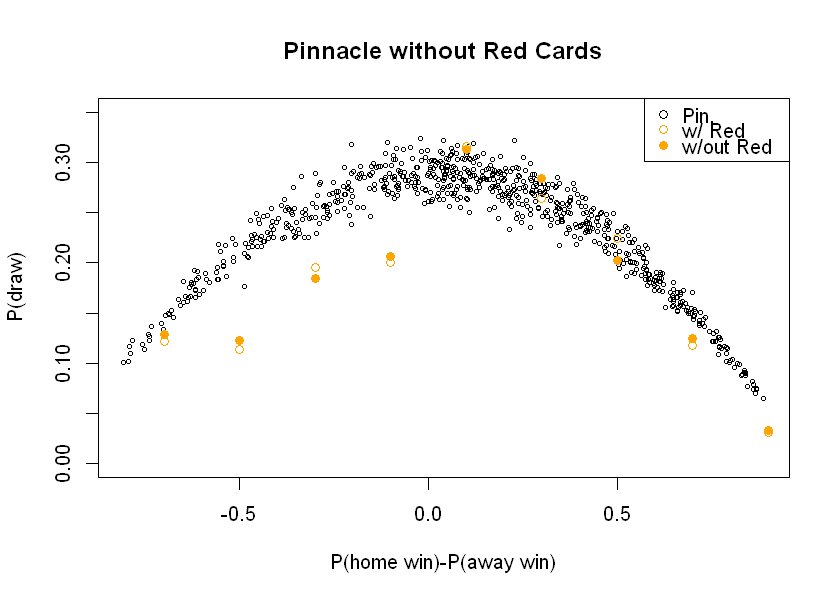

In [11]:
#Bookmaker 2 - Pinnacle
prob2NR <- data.frame("pHW"=1/dataNR$PSH, "pTie"=1/dataNR$PSD,
                    "pAW"=1/dataNR$PSA, "Result"=dataNR$FTR)
prob2NR$normHW <- prob2NR$pHW*(1/(prob2NR$pHW+prob2NR$pTie+prob2NR$pAW))
prob2NR$normAW <- prob2NR$pAW*(1/(prob2NR$pHW+prob2NR$pTie+prob2NR$pAW))
prob2NR$normTie <- prob2NR$pTie*(1/(prob2NR$pHW+prob2NR$pTie+prob2NR$pAW))

prob2NR$bins <- cut(prob2NR$pHW-prob2NR$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin2NR <- tapply(prob2NR$Result, prob2NR$bins, function(x) sum(x=='D'))
DinBin2NR <- DinBin2NR/summary(prob2NR$bins)
plot(prob2NR$normHW-prob2NR$normAW, prob2NR$normTie, col="black", 
     cex=.5, ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Pinnacle without Red Cards')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin2, pch=1, col='orange')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin2NR, pch=19, col='orange')
legend("topright", c("Pin.", "w/ Red", "w/out Red"), col=c("black","orange", "orange"), pch=c(1,1,19) )

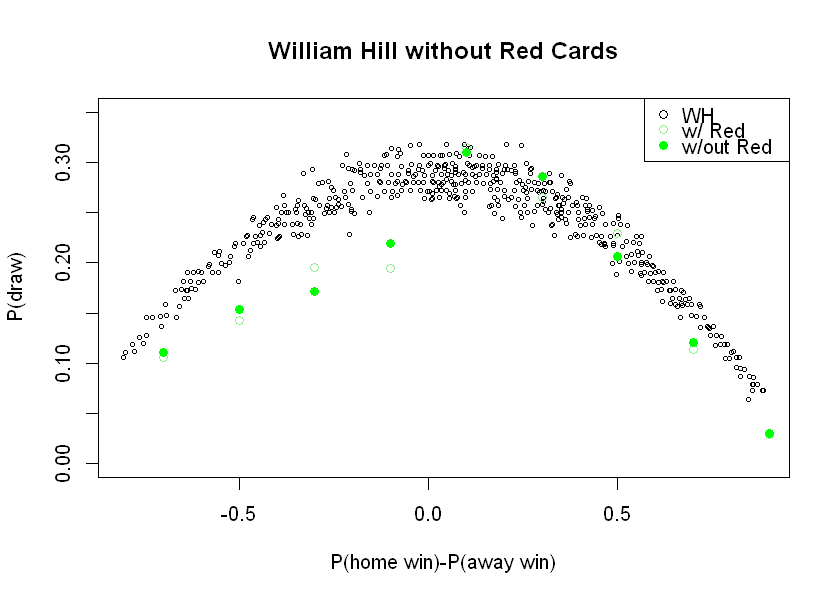

In [12]:
#William Hill NR
prob3NR <- data.frame("pHW"=1/dataNR$WHH, "pTie"=1/dataNR$WHD,
                    "pAW"=1/dataNR$WHA, "Result"=dataNR$FTR)
prob3NR$normHW <- prob3NR$pHW*(1/(prob3NR$pHW+prob3NR$pTie+prob3NR$pAW))
prob3NR$normAW <- prob3NR$pAW*(1/(prob3NR$pHW+prob3NR$pTie+prob3NR$pAW))
prob3NR$normTie <- prob3NR$pTie*(1/(prob3NR$pHW+prob3NR$pTie+prob3NR$pAW))

prob3NR$bins <- cut(prob3NR$pHW-prob3NR$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin3NR <- tapply(prob3NR$Result, prob3NR$bins, function(x) sum(x=='D'))
DinBin3NR <- DinBin3NR/summary(prob3NR$bins)
plot(x=prob3NR$normHW-prob3NR$normAW, y=prob3NR$normTie, col="black", 
     cex=.5, 
     ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='William Hill without Red Cards')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin3, pch=1, col='lightgreen')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin3NR, pch=19, col='green')
legend("topright", c("WH", "w/ Red", "w/out Red"), col=c("black","lightgreen", "green"), pch=c(1,1,19) )

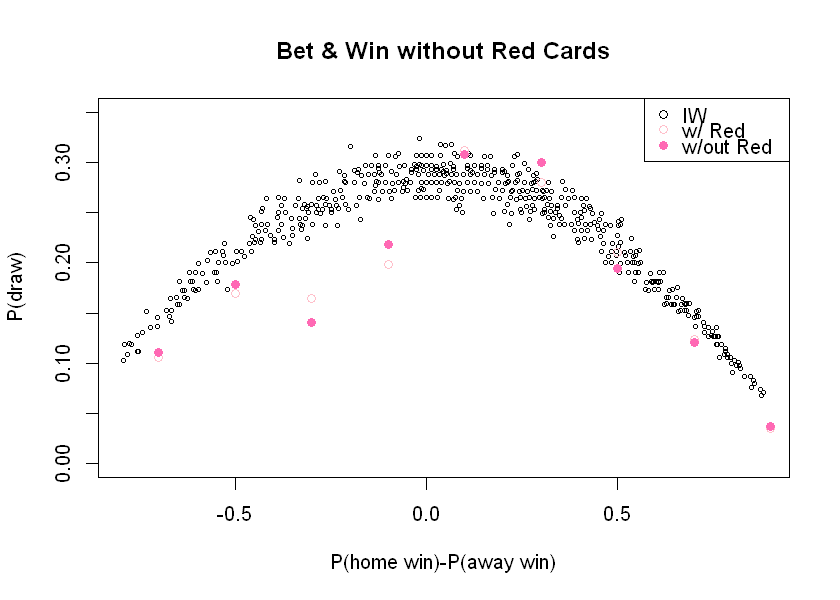

In [13]:
#Bet & Win NR
prob4NR <- data.frame("pHW"=1/dataNR$BWH, "pTie"=1/dataNR$BWD,
                    "pAW"=1/dataNR$BWA, "Result"=dataNR$FTR)
prob4NR$normHW <- prob4NR$pHW*(1/(prob4NR$pHW+prob4NR$pTie+prob4NR$pAW))
prob4NR$normAW <- prob4NR$pAW*(1/(prob4NR$pHW+prob4NR$pTie+prob4NR$pAW))
prob4NR$normTie <- prob4NR$pTie*(1/(prob4NR$pHW+prob4NR$pTie+prob4NR$pAW))

prob4NR$bins <- cut(prob4NR$pHW-prob4NR$pAW, breaks=seq(-1,1, by=0.2),
                  include.lowest=TRUE, right=FALSE)
DinBin4NR <- tapply(prob4NR$Result, prob4NR$bins, function(x) sum(x=='D'))
DinBin4NR <- DinBin4NR/summary(prob4NR$bins)
plot(x=prob4NR$normHW-prob4NR$normAW, y=prob4NR$normTie, col="black", 
     cex=.5, 
     ylim=c(0,0.35),
     xlab='P(home win)-P(away win)',
     ylab='P(draw)', main='Bet & Win without Red Cards')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin4, pch=1, col='pink')
points(x=seq(-0.9,0.9,by=0.2),y=DinBin4NR, pch=19, col='hotpink')
legend("topright", c("IW", "w/ Red", "w/out Red"), col=c("black","pink", "hotpink"), pch=c(1,1,19) )